# Central cropping


> Swim out of your little pond.
>
> – Rumi
 
In this short tutorial we will see one way of cropping the central portion of images to target height and width with the use of a Keras Layer.


### Getting ready

In [79]:

import numpy as np
import os
import tensorflow as tf

from matplotlib import pyplot as plt
from IPython import display

target_height = 200
target_width = 800

image_paths = []
image_paths.append('./images/boot_ganga_1.jpg')
image_paths.append('./images/boot_ganga_2.jpg')



### Preprocessing image

1. Loading two image files into PIL format: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img

2. Converting the PIL Imagse instance to Numpy arrays:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/img_to_array



In [80]:
image_np_arries = []

for image_path in image_paths:

    image_pil = tf.keras.preprocessing.image.load_img(image_path) #(1)

    image_np_array = tf.keras.preprocessing.image.img_to_array(image_pil) #(2)

    image_np_arries.append(image_np_array)

    height, width, _ = image_np_array.shape

    print("height/width of {} : {}/{}".format(os.path.basename(image_path),image_np_array.shape[0],image_np_array.shape[1]))

image_np_array_batch = np.array(image_np_arries)

print(image_np_array_batch[1].shape)


height/width of boot_ganga_1.jpg : 800/1200
height/width of boot_ganga_2.jpg : 800/1200
(800, 1200, 3)


### Original Images


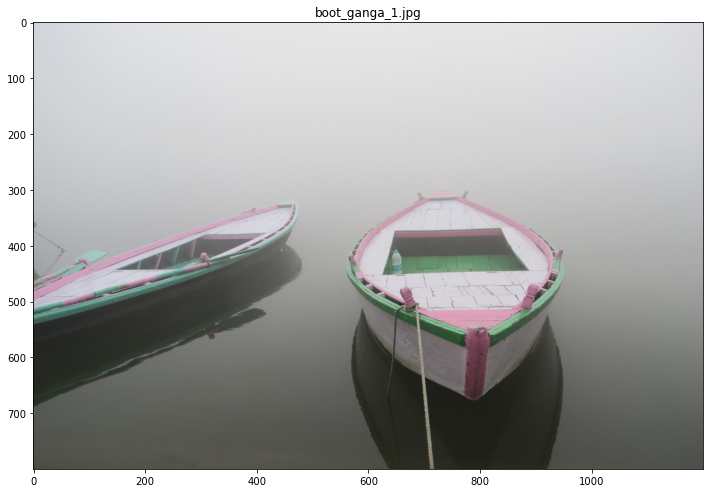

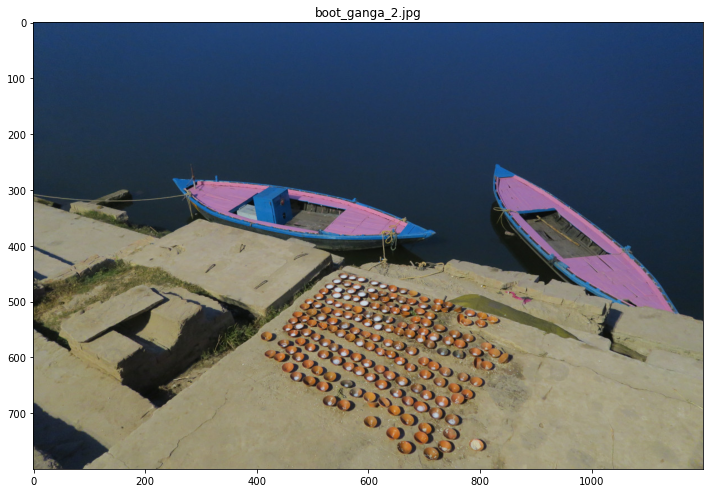

In [81]:
for idx, image_np_array in enumerate(image_np_array_batch):

    plt.figure(figsize=(12,12))

    plt.title(os.path.basename(image_paths[idx]))
    plt.imshow(image_np_array/255.0)

    plt.plot()




### Cropping the images

1) Creating a CenterCrop layer for given target height & width with Kears 
https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/CenterCrop

2) Cropping the image


In [82]:

center_crop_layer = tf.keras.layers.experimental.preprocessing.CenterCrop(target_height,target_width) #(1)

image_cropped_np_array_batch = center_crop_layer(image_np_array_batch) #(2)

#print("Keras CenterCrop Layer output shape (Numpy Array): {}".format(image_cropped_np_array_batch.shape))


### The glorious result


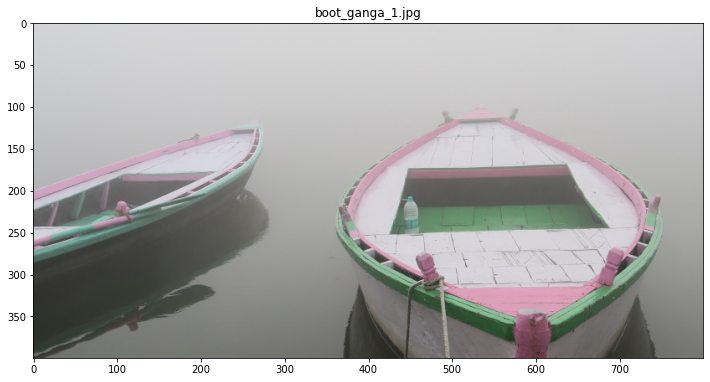

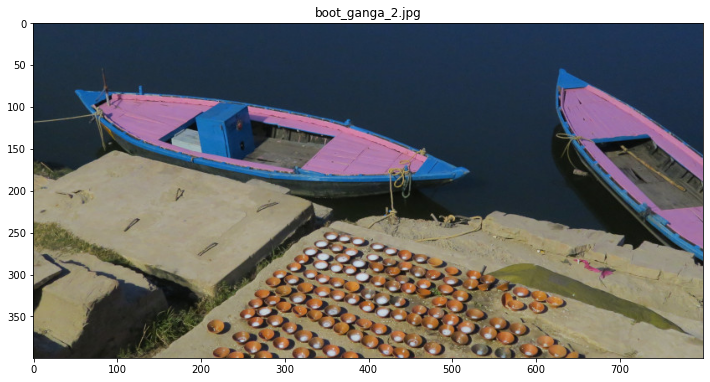

In [83]:
for idx, image_cropped_np_array in enumerate(image_cropped_np_array_batch):

    plt.figure(figsize=(12,12))

    plt.title(os.path.basename(image_paths[idx]))
    plt.imshow(image_cropped_np_array/255.0)

    plt.plot()

